# Метод парабол
# Авиценна & Ашот

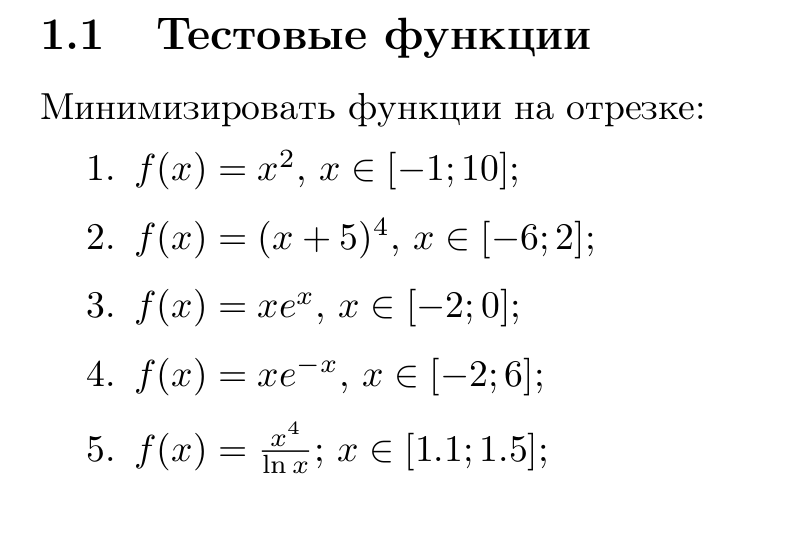

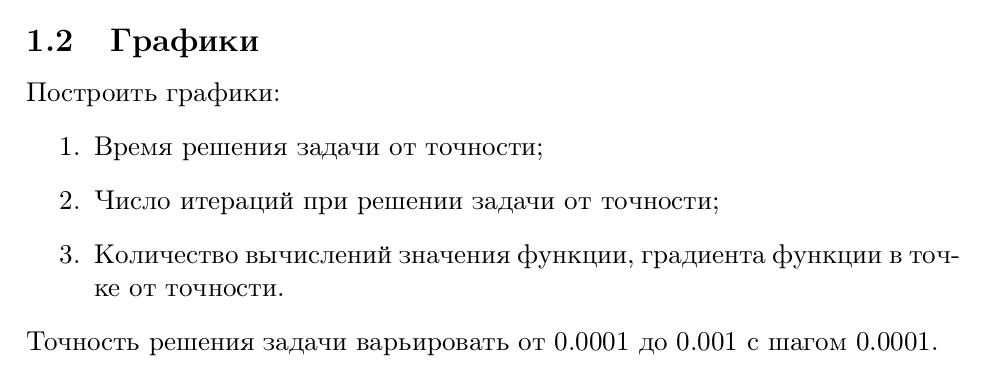

In [3]:
# Метод Парабол
# Язык Python (версия 3.9.7)
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    def foo(x_i):
        return x_i * math.exp(x_i)
    if isinstance(x,float) or isinstance(x,int):
        return foo(x)
    
    return [foo(i) for i in x]

# Функция, находящая точку минимума параболы, проходящей через 3 определенные точки аппроксимируемой функции:
def XMin ( x1, x2, x3, func):
    X = x2 - 0.5 * ( ((x2 - x1)**2) * (func (x2) - func ( x3 ))
                    - ((x2 - x3)**2) * (func (x2) - func ( x1 ))) \
    / ( (x2 - x1) * (func (x2) - func ( x3 )) - (x2 - x3) * (func (x2) - func ( x1 )))
    return X

# Начальные условия
a = -2 ; c = 0
b = ( a + c ) / 2
Eps = 10 ** (-3)

minimum = XMin (a, b, c, f)

# Сама функция поиска
while abs(minimum-b )>Eps:
    # сортирует точки по возрастанию (для унимодальной на отрезке функции правомочно)
    dots = sorted ( [ a, b, c, minimum] )
    Values = f (dots)
    FMax = max ( Values)
    # ищет индекс точки, в которой функция принимает наибольшее из четырех значение
    for i in range ( len(Values) ):
        if Values[i] == FMax:
            break
    # убирает точку с этим индексом
    dots.remove ( dots [ i ] )             
    a , b , c = dots   
    minimum = XMin (a, b, c, f)
    
print (minimum)

-1.0007236039705323


Text(0.5, 1.0, 'График функции $f(x) = x^4 \\cdot e^x$')

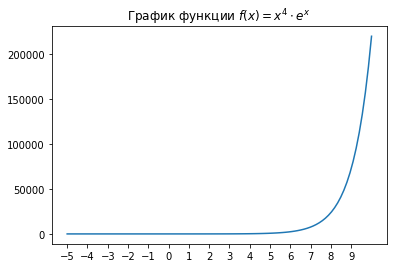

In [4]:
points = np.linspace(-5,10,100)
plt.plot(points,f(points))

x_ticks = list(range(-5,10,1))
plt.xticks(x_ticks)
plt.title(r'График функции $f(x) = x^4 \cdot e^x$')

In [5]:
import time

# время решения
prec = 0.0001
time_l = list()
prec_l = list()
iter_l = list()
f_count_l = list()
while prec <= 0.001:
    # Начальные условия
    t0 = time.time()
    a = 1.1; c = 1.5
    b = ( a + c ) / 2
    Eps = prec

    minimum = XMin (a, b, c, f)

    # Сама функция поиска
    iter_count = 0
    f_count = 0
    while abs(minimum-b )>Eps:
        # сортирует точки по возрастанию (для унимодальной на отрезке функции правомочно)
        dots = sorted ( [ a, b, c, minimum] )
        Values = f (dots)
        f_count += 1
        FMax = max ( Values)
        # ищет индекс точки, в которой функция принимает наибольшее из четырех значение
        for i in range ( len(Values) ):
            iter_count += 1
            if Values[i] == FMax:
                break
        # убирает точку с этим индексом
        dots.remove ( dots [ i ] )             
        a , b , c = dots   
        minimum = XMin (a, b, c, f)
    t1 = time.time()
    prec_l.append(prec)
    time_l.append(t1-t0)
    iter_l.append(iter_count)
    f_count_l.append(f_count)
    prec+= 0.0001
    iter_count = 0
    #print (minimum)

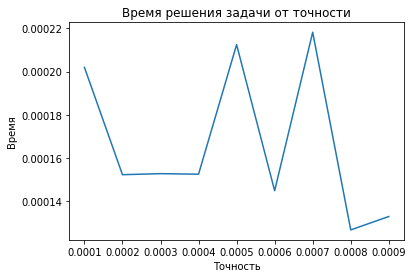

In [6]:
plt.title('Время решения задачи от точности')
plt.xlabel('Точность')
plt.ylabel('Время')
plt.plot(prec_l, time_l)

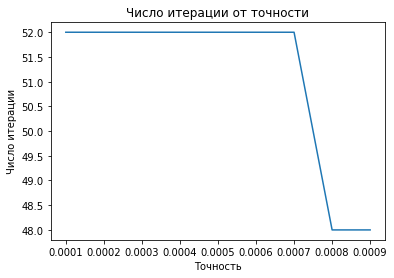

In [7]:
plt.title('Число итерации от точности')
plt.xlabel('Точность')
plt.ylabel('Число итерации')
plt.plot(prec_l, iter_l)

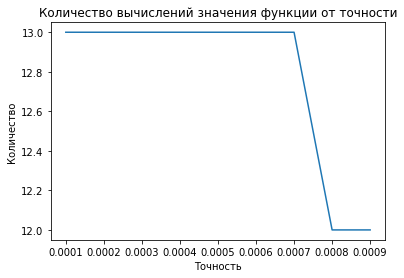

In [8]:
plt.title('Количество вычислений значения функции от точности')
plt.xlabel('Точность')
plt.ylabel('Количество')
plt.plot(prec_l, f_count_l)